In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from script import *

%reload_ext watermark
%watermark -iv -v -p pycaret

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.25.0

pycaret: 3.3.2

matplotlib: 3.7.5
numpy     : 1.26.4
seaborn   : 0.13.2
pandas    : 2.1.4



In [2]:
# Lendo CSV.
df = pd.read_csv('.\input\matches.csv',parse_dates=['Date'])

# Drop nas colunas sem relevância.
df.drop(columns=['Unnamed: 0', 'Notes', 'Match Report', 'Comp'], inplace=True)

# Transformando os times, rodada, dia da semana, jogo casa/fora e 'Result' em códigos numéricos.
df['Team_cod'] = df['Team'].map(Teams)
df['Opponent_cod'] = df['Opponent'].map(Teams_Opponent)
df['Opponent'] = df['Opponent_cod'].map({valor: chave for chave, valor in Teams.items()})
df['Round'] = df['Round'].map(Matchweek)
df['Day'] = df['Day'].map(weekday)
df['Venue'] = df['Venue'].map({'Away': 0, 'Home': 1})
df['Points'] = df['Result'].apply(lambda x: 3 if x == 'W' else (1 if x == 'D' else 0))

# Amostra dos dados.
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,SoT,Dist,FK,PK,PKatt,Season,Team,Team_cod,Opponent_cod,Points
0,2023-08-13,16:30,1,6,0,D,1.0,1.0,Chelsea,1.3,...,1.0,17.8,0.0,0,0,2024,Liverpool,11,7,1
1,2023-08-19,15:00,2,5,1,W,3.0,1.0,Bournemouth,3.0,...,9.0,16.8,1.0,0,1,2024,Liverpool,11,3,3
2,2023-08-27,16:30,3,6,0,W,2.0,1.0,NewcastleUnited,0.9,...,4.0,17.2,1.0,0,0,2024,Liverpool,11,15,3
3,2023-09-03,14:00,4,6,1,W,3.0,0.0,AstonVilla,2.5,...,4.0,14.7,0.0,0,0,2024,Liverpool,11,2,3
4,2023-09-16,12:30,5,5,0,W,3.0,1.0,WolverhamptonWanderers,2.5,...,5.0,15.8,0.0,0,0,2024,Liverpool,11,20,3


In [3]:
# Classificação da Premier League.
tabela = df.groupby('Team')['Points'].sum().sort_values(ascending=False).to_frame()
tabela

,Points
Team,
Liverpool,54
ManchesterCity,52
Arsenal,52
TottenhamHotspur,47
AstonVilla,46
ManchesterUnited,41
NewcastleUnited,36
WestHamUnited,36
BrightonandHoveAlbion,35


In [4]:
# Criando coluna 'Matches' para informar as partidas.
for i in df['Team'].unique():
    for j in df['Opponent'].unique():

        Template = i + ' x ' + j

        df.loc[((df['Team'] == i) & (df["Opponent"] == j)) | ((df['Team'] == j) & (df["Opponent"] == i)), 'Matches'] = Template
        
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,Dist,FK,PK,PKatt,Season,Team,Team_cod,Opponent_cod,Points,Matches
0,2023-08-13,16:30,1,6,0,D,1.0,1.0,Chelsea,1.3,...,17.8,0.0,0,0,2024,Liverpool,11,7,1,Chelsea x Liverpool
1,2023-08-19,15:00,2,5,1,W,3.0,1.0,Bournemouth,3.0,...,16.8,1.0,0,1,2024,Liverpool,11,3,3,Bournemouth x Liverpool
2,2023-08-27,16:30,3,6,0,W,2.0,1.0,NewcastleUnited,0.9,...,17.2,1.0,0,0,2024,Liverpool,11,15,3,NewcastleUnited x Liverpool
3,2023-09-03,14:00,4,6,1,W,3.0,0.0,AstonVilla,2.5,...,14.7,0.0,0,0,2024,Liverpool,11,2,3,AstonVilla x Liverpool
4,2023-09-16,12:30,5,5,0,W,3.0,1.0,WolverhamptonWanderers,2.5,...,15.8,0.0,0,0,2024,Liverpool,11,20,3,WolverhamptonWanderers x Liverpool


In [5]:
analise(df, 'Result')

,dtype,contagem,missing,nunique,papel
Date,datetime64[ns],476,0,75,covariavel
Time,object,476,0,11,covariavel
Round,int64,476,0,24,covariavel
Day,int64,476,0,7,covariavel
Venue,int64,476,0,2,covariavel
Result,object,476,0,3,resposta
GF,float64,476,0,8,covariavel
GA,float64,476,0,8,covariavel
Opponent,object,476,0,20,covariavel
xG,float64,476,0,43,covariavel


In [6]:
df_home = df[df['Venue'] == 1].copy().reset_index(drop=True)
df_away = df[df['Venue'] == 0].copy().reset_index(drop=True)

In [60]:
merged_df = pd.merge(df_home, df_away, on=['Matches', 'Round'], suffixes=['', '_Opponent'])
merged_df.head().T

,0,1,2,3,4
Date,2023-08-19 00:00:00,2023-09-03 00:00:00,2023-09-24 00:00:00,2023-10-21 00:00:00,2023-10-29 00:00:00
Time,15:00,14:00,14:00,12:30,14:00
Round,2,4,6,9,10
Day,5,6,6,5,6
Venue,1,1,1,1,1
Result,W,W,W,W,W
GF,3.0,3.0,3.0,2.0,3.0
GA,1.0,0.0,1.0,0.0,0.0
Opponent,Bournemouth,AstonVilla,WestHamUnited,Everton,NottinghamForest
xG,3.0,2.5,3.0,2.2,3.2


In [67]:
drop_columns = ['Date', 'Time', 'Day',
                'Venue', 'GF', 'GA', 'Opponent',
                'Captain', 'Referee', 'Season',
                'Team', 'Points', 'Matches', 'Date_Opponent', 'Time_Opponent',
                'Day_Opponent', 'Venue_Opponent', 'Result_Opponent', 'GF_Opponent',
                'GA_Opponent', 'Opponent_Opponent', 'xG_Opponent', 'xGA_Opponent',
                'Attendance_Opponent', 'Captain_Opponent', 'Referee_Opponent',
                'Season_Opponent', 'Team_Opponent', 'Team_cod_Opponent', 'Opponent_cod_Opponent', 'Points_Opponent']

df_model = merged_df.drop(columns=drop_columns)

analise(df_model, 'Points')

,dtype,contagem,missing,nunique,papel
Round,int64,238,0,24,covariavel
Result,object,238,0,3,covariavel
xG,float64,238,0,37,covariavel
xGA,float64,238,0,37,covariavel
Poss,float64,238,0,57,covariavel
Attendance,float64,238,0,230,covariavel
Formation,object,238,0,15,covariavel
Sh,float64,238,0,30,covariavel
SoT,float64,238,0,14,covariavel
Dist,float64,238,0,91,covariavel


In [126]:
clf = setup(data=df_model,
            target='Result',
            fold=70)

,Description,Value
0,Session id,8121
1,Target,Result
2,Target type,Multiclass
3,Target mapping,"D: 0, L: 1, W: 2"
4,Original data shape,"(238, 23)"
5,Transformed data shape,"(238, 44)"
6,Transformed train set shape,"(166, 44)"
7,Transformed test set shape,"(72, 44)"
8,Numeric features,20
9,Categorical features,2


In [127]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6500,0.0000,0.6500,0.5607,0.5851,0.3910,0.4287,0.0134
lr,Logistic Regression,0.6286,0.0000,0.6286,0.5528,0.5730,0.3938,0.4303,0.0837
gbc,Gradient Boosting Classifier,0.6286,0.0000,0.6286,0.5500,0.5698,0.4200,0.4557,0.0764
dt,Decision Tree Classifier,0.6238,0.1893,0.6238,0.5627,0.5770,0.4029,0.4223,0.0136
et,Extra Trees Classifier,0.6214,0.1702,0.6214,0.5143,0.5462,0.3500,0.3755,0.0399
lda,Linear Discriminant Analysis,0.6119,0.0000,0.6119,0.5341,0.5565,0.3471,0.3771,0.0136
lightgbm,Light Gradient Boosting Machine,0.6095,0.1810,0.6095,0.5179,0.5425,0.3462,0.3755,0.0586
rf,Random Forest Classifier,0.5976,0.1714,0.5976,0.4845,0.5171,0.3305,0.3612,0.0464
ada,Ada Boost Classifier,0.5881,0.0000,0.5881,0.4913,0.5198,0.3543,0.3982,0.0281
nb,Naive Bayes,0.5714,0.1857,0.5714,0.4663,0.4981,0.3019,0.3446,0.0137


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=8121, solver='auto',
                tol=0.0001)

In [128]:
ridge = create_model(estimator='ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
1,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
2,0.3333,0.0000,0.3333,0.1667,0.2222,0.0000,0.0000
3,0.3333,0.0000,0.3333,0.1111,0.1667,0.0000,0.0000
4,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
5,0.3333,0.0000,0.3333,0.1667,0.2222,0.0000,0.0000
6,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
7,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
8,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124


In [133]:
tuned_ridge = tune_model(estimator=ridge, optimize='Kappa')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
1,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
2,0.3333,0.0000,0.3333,0.1111,0.1667,0.0000,0.0000
3,0.3333,0.0000,0.3333,0.1111,0.1667,0.0000,0.0000
4,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
5,0.3333,0.0000,0.3333,0.1667,0.2222,0.0000,0.0000
6,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
7,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124
8,0.6667,0.0000,0.6667,0.5000,0.5556,0.5000,0.6124


Fitting 70 folds for each of 10 candidates, totalling 700 fits


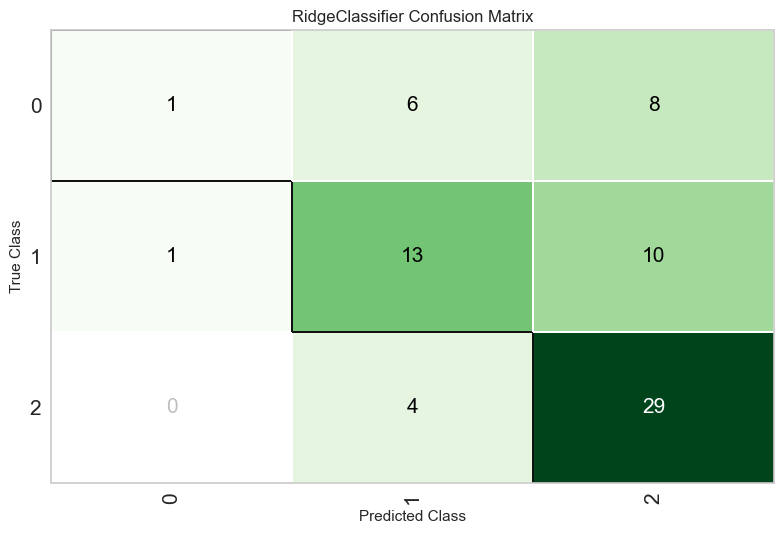

In [134]:
plot_model(estimator=tuned_ridge, plot='confusion_matrix')

# Projeto Semantix

O objetivo deste projeto é encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning. A ideia do projeto é explanar e **justificar** a **relevância** do uso de dados para encontrar a solução.

O tema em que vamos focar neste projeto é futebol, vamos baixar um dataset fornecido pelo [Kaggle](http://www.kaggle.com/) contendo todas as informações de cada partidade de futebol da Premier League do ano de 2023/24.

O objetivo será treinar um modelo de machine learning para prever qual time foi o vencedor ou se foi empate. Para isso iremos utilizar as bibliotecas, como o pandas, para nossa análise exploratória de dados e bibliotecas para a plotagem dos gráficos, como matplotlib e seaborn.

Para a modelagem iremos utilizar o PyCaret para buscar o melhor resultado possível.

 >O link para o dataset que se encontra no Kaggle é este: [LINK](https://www.kaggle.com/datasets/mertbayraktar/english-premier-league-matches-20232024-season)

---

## **1. Dados do Dataset:** 

Os dados representam informações dos jogos da Premier League do ano de 2023/24 e contam com as seguintes colunas: 

| *Coluna*            | *Explicação*                          |
|---------------------|---------------------------------------|
| Date                | Data                                  |
| Time                | Horário                               |
| Comp                | "Premier League"                      |
| Round               | Rodada da partida                     |
| Day                 | Dia da Semana                         |
| Venue               | "Home"                                |
| Result              | Resultado da partida ("W", "L" ou "D")|
| GF                  | Gols Marcados                         |
| GA                  | Gols Sofridos                         |
| Opponent            | Oponente                              |
| xG                  | Gols Marcados esperados               |
| xGA                 | Gols Sofridos esperados               |
| Poss                | Posse de bola                         |
| Attendance          | Público presente                      |
| Captain             | Capitão do Time                       |
| Formation           | Formação do Time                      |
| Referee             | Árbitro                               |
| Sh                  | Total de Chutes                       |
| SoT                 | Total de Chutes a Gol                 |
| Dist                | Distância Média  dos Chutes           |
| FK                  | Chutes de Falta                       |
| PK                  | Penaltis Convertidos                  |
| PKatt               | Penaltis Cobrados                     |
| Season              | "2024"                                |
| Team                | Time Mandante                         |
| Captain_Opponent    | Capitão do Time                       |
| Formation_Opponent  | Formação do Time                      |
| Sh_Opponent         | Total de Chutes                       |
| SoT_Opponent        | Total de Chutes a Gol                 |
| Dist_Opponent       | Distância Média dos Chutes            |
| FK_Opponent         | Chutes de Falta                       |
| PK_Opponent         | Penaltis Convertidos                  |
| PKatt_Opponent      | Penaltis Cobrados                     |


---

## **2. Análise Exploratória de Dados (EDA):** 

Vamos carregar nosso dataset e analisar cada um dos dados.

In [101]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,Dist,FK,PK,PKatt,Season,Team,Team_cod,Opponent_cod,Points,Matches
0,2023-08-13,16:30,1,6,0,D,1.0,1.0,Chelsea,1.3,...,17.8,0.0,0,0,2024,Liverpool,11,7,1,Chelsea x Liverpool
1,2023-08-19,15:00,2,5,1,W,3.0,1.0,Bournemouth,3.0,...,16.8,1.0,0,1,2024,Liverpool,11,3,3,Bournemouth x Liverpool
2,2023-08-27,16:30,3,6,0,W,2.0,1.0,NewcastleUnited,0.9,...,17.2,1.0,0,0,2024,Liverpool,11,15,3,NewcastleUnited x Liverpool
3,2023-09-03,14:00,4,6,1,W,3.0,0.0,AstonVilla,2.5,...,14.7,0.0,0,0,2024,Liverpool,11,2,3,AstonVilla x Liverpool
4,2023-09-16,12:30,5,5,0,W,3.0,1.0,WolverhamptonWanderers,2.5,...,15.8,0.0,0,0,2024,Liverpool,11,20,3,WolverhamptonWanderers x Liverpool
